#### Steps in building a model
* Read data
* Feature engineering
* Create a train set and a test set
* Use train set to build the model
* Test the model
* Visualize

In [2]:
# Importing essential libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


### Read data

In [3]:
#importing data from csv file
computers = pd.read_csv("computers.csv")
computers.head(5)

,Units,Minutes
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74


### Feature engineering

In [4]:
# Calculating the mean
mean_value = computers['Minutes'].mean()
mean_value

97.21428571428571

Text(0, 0.5, 'Minutes')

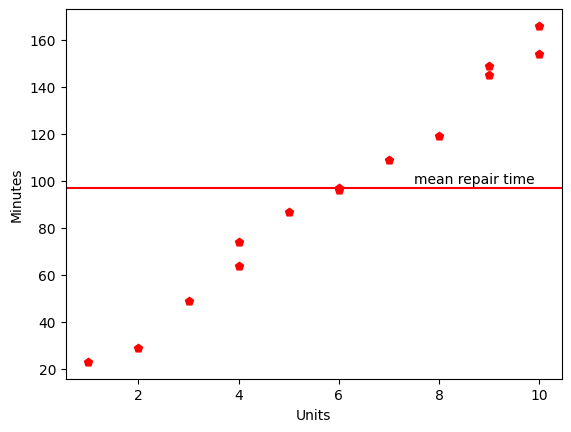

In [17]:
# Plotting the actual time taken for various values of number of faulty units.
plt.scatter(computers["Units"],computers["Minutes"],color = "red" , marker="p")

# Plotting the mean time
plt.axhline(y=mean_value, c="r")

# Plotting the annotations , x-label , y-label
plt.annotate("mean repair time",xy=(7.5,mean_value+2))
plt.xlabel("Units")
plt.ylabel("Minutes")

